<a href="https://colab.research.google.com/github/anaguilarar/ghg_emissions/blob/main/ghg_emissions_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Greenhouse gas (GHG) emissions for agriculture: Examples

The GHG measurement, produced by agricultural activities such as fertilizers, irrigation, tillage, among others, is important for quantifying the impact that this sector has on climate change. For that reason, several methodologies have been proposed to address a baseline measurement using data from farmers. The main purpose of this repository is to offer a tool able to gauge GHG emissions estimation for multiple commercial cropping events. It is important to mention that this work is based on the Mitigation Option Tool for Agriculture project([CCAFS - MOT](https://ccafs.cgiar.org/research/projects/mitigation-options-tool-agriculture-ccafs-mot)) developed by CCAFS and The Aberdeen University. 

Clonning the repository

Following examples are made for gauging GHG emissions from farmer productive events. The first one shows how many CO<sub>2</sub> eq.ha<sup>-1</sup> was produced from fields planted with maize.
First step is to clone the repository

In [1]:
!git clone https://github.com/anaguilarar/ghg_emissions.git

Cloning into 'ghg_emissions'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 105 (delta 32), reused 89 (delta 18), pack-reused 0
Receiving objects: 100% (105/105), 4.20 MiB | 3.41 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [2]:
!pip install rasterio

     |████████████████████████████████| 19.1MB 29.7MB/s 


# Example1:

We are going to relocate the current work directory to ghg_emissions folder

In [7]:
import os 
os.chdir("ghg_emissions")

Now we can run our first example. This data has information from multiple crop events.

In [5]:
from scripts import crop_ghg_emissions as ghg
from scripts import plot_functions
ghg_data = ghg.ghg_emissions('data/inputs_mot_example.xlsx', ## file path to the general information 
                             'data/fertiliser_inputs_mot_example.xlsx', ## file path to the fertilizers information   
                             id_event= 'event_7') ## you can ppoint out an specif crop event, or for run through the all events don't put this paremeter


calculating emissions for event_7
Climate Classification: tropical moist


Once we use our ghg_emissions function, we can check the GHG emissions (CO<sub>2</sub> eq.ha<sup>-1</sup>) regarding to Burning residues, Land use change, Soil mining, Soil management, and Fertilisers.

In [8]:
ghg_data.emissions_summary

,id_event,municipality,Fertiliser production,Fertlises induced field emissions,Soil Management,Soil Mining,Land Use Change effect on soil,Burning residues,Methane from rice
0,event_7,cartagena,0.0,31.36,-1638.12,786.200471,4712.4,0,707.623378


In the case that we are interested on calculating emisisons for multiple crop event, we must no include the id_event parameter

In [9]:
ghg_data = ghg.ghg_emissions('data/inputs_mot_example.xlsx', ## file path to the general information 
                             'data/fertiliser_inputs_mot_example.xlsx')

ghg_data.emissions_summary

calculating emissions for event_0
Climate Classification: subtropical dry
calculating emissions for event_1
Climate Classification: subtropical dry
calculating emissions for event_2
Climate Classification: subtropical dry
calculating emissions for event_3
Climate Classification: tropical moist
calculating emissions for event_4
Climate Classification: tropical moist
calculating emissions for event_5
Climate Classification: tropical moist
calculating emissions for event_6
Climate Classification: tropical moist
calculating emissions for event_7
Climate Classification: tropical moist


,id_event,municipality,Fertiliser production,Fertlises induced field emissions,Soil Management,Soil Mining,Land Use Change effect on soil,Burning residues,Methane from rice
0,event_0,cundinamarca,584.37,1019.36,-4304.35,0.000000,8910.000000,876.359608,NaN
0,event_1,santander,206.00,305.77,-374.66,809.750588,1691.397849,0.000000,NaN
0,event_2,nariño,484.04,344.79,-1430.00,0.000000,0.000000,0.000000,NaN
0,event_3,córdoba,650.93,772.42,-4895.60,1805.334588,0.000000,666.949453,NaN
0,event_4,mmm,1384.00,2693.56,0.00,0.000000,4712.400000,73.510650,NaN
0,event_5,reykiavik,248.00,480.56,-2288.00,0.000000,1801.800000,0.000000,NaN
0,event_6,pasto,252.44,126.19,-7227.00,686.263529,6237.000000,1134.429870,38453.949262
0,event_7,cartagena,0.00,31.36,-1638.12,786.200471,4712.400000,0.000000,707.623378


###Visualization

For an easy visualization, we included a bar plot graphic

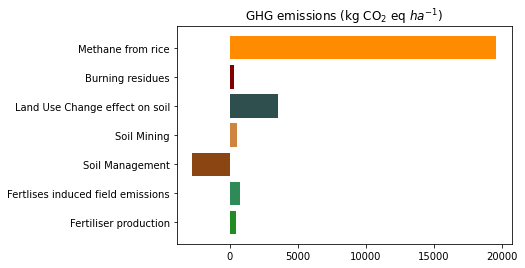

In [10]:
plot_functions.bar_plot_emissions(
    ghg_data.emissions_summary, #  table summary obtained from previous step
    'mean')# function to aggregated all crop events

A final plot was also included aimed at showing the emissions for an specific locality

In [11]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(municipality):
    subset = datatest.loc[datatest['municipality'] == municipality]
    plot_functions.bar_plot_emissions(subset, 'mean')
    
datatest = ghg_data.emissions_summary.copy()
interact(f, municipality=datatest.municipality.unique())

interactive(children=(Dropdown(description='municipality', options=('cundinamarca', 'santander', 'nariño', 'có…

<function __main__.f>

###Export table

Using the next line, you will be able to save the GHG summary as a csv table.

In [17]:
ghg_data.emissions_summary.to_csv("ghg_emissions_summary.csv")

# Example 2:

Now we are going to calculate the GHG emission for crop events, which were only reported fertilizers amount.
In this scenario the code will download soil data from soilgrid's webpage. This new information will be stored at temp folder as raster files.

In [12]:
ghg_data = ghg.ghg_emissions('data/inputs_example2.xlsx', 
                             'data/fertiliser_inputs_example2.xlsx')

calculating emissions for 537
ocs_0-30cm_mean.tif file was created
bdod_0-5cm_mean.tif file was created
nitrogen_0-5cm_mean.tif file was created
ocd_0-5cm_mean.tif file was created
Soil properties were drawn from soilgrid
 bulk_density:1.34 n_content: 0.568 pH_content: 6.0, soil_organic_content:3.99
calculating emissions for 543
Soil properties were drawn from soilgrid
 bulk_density:1.31 n_content: 0.455 pH_content: 5.0, soil_organic_content:3.8
calculating emissions for 53
Soil properties were drawn from soilgrid
 bulk_density:1.38 n_content: 0.442 pH_content: 7.0, soil_organic_content:3.82
Climate Classification: tropical moist
calculating emissions for 54
Soil properties were drawn from soilgrid
 bulk_density:1.39 n_content: 0.455 pH_content: 7.0, soil_organic_content:3.82
Climate Classification: tropical moist
calculating emissions for 56
Soil properties were drawn from soilgrid
 bulk_density:1.39 n_content: 0.455 pH_content: 7.0, soil_organic_content:3.82
Climate Classification: t

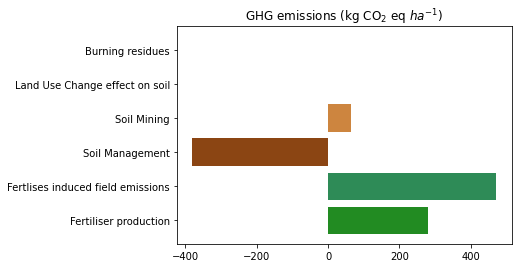

In [13]:
plot_functions.bar_plot_emissions(
    ghg_data.emissions_summary, #  table summary obtained from previous step
    'mean')# function to aggregated all crop events

In [14]:
ghg_data.emissions_summary

,id_event,municipality,Fertiliser production,Fertlises induced field emissions,Soil Management,Soil Mining,Land Use Change effect on soil,Burning residues
0,537,CERETE,276.30,498.84,0.0,0.000000,0,0
0,543,CIENAGA DE ORO,207.23,403.59,0.0,0.000000,0,0
0,53,CERETE,138.15,305.33,-1848.0,268.235294,0,0
0,54,CERETE,276.30,498.84,0.0,0.000000,0,0
0,56,CERETE,138.15,305.33,-1848.0,332.178824,0,0
...,...,...,...,...,...,...,...,...
0,836,CIENAGA DE ORO,345.38,597.52,0.0,0.000000,0,0
0,841,MONTERIA,338.30,499.07,0.0,88.865882,0,0
0,839,CERETE,276.30,498.84,0.0,0.000000,0,0
0,785,CERETE,388.16,618.60,0.0,0.000000,0,0


In [15]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(municipality):
    subset = datatest.loc[datatest['municipality'] == municipality]
    plot_functions.bar_plot_emissions(subset, 'mean')
    
datatest = ghg_data.emissions_summary.copy()
interact(f, municipality=datatest.municipality.unique())

interactive(children=(Dropdown(description='municipality', options=('CERETE', 'CIENAGA DE ORO', 'SAN PELAYO', …

<function __main__.f>